### **Importing the libraries**

In [44]:
import pandas as pd
import seaborn as sns

### **Loading the dataset**

In [45]:
df = pd.read_csv('imdb_kaggle.csv')
df

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List
...,...,...,...,...,...,...,...,...,...
995,996,1991,1h 56m,15,7.6,(129K),69.0,A renowned New York playwright is enticed to C...,Barton Fink
996,997,1993,3h 8m,18,7.6,(48K),81.0,The day-to-day lives of several suburban Los A...,Short Cuts
997,998,2007,2h 2m,15,7.6,(69K),78.0,"A profile of Ian Curtis, the enigmatic singer ...",Control
998,999,2013,1h 38m,12A,7.6,(104K),77.0,A world-weary political journalist picks up th...,Philomena


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   year              1000 non-null   int64  
 2   duration          1000 non-null   object 
 3   age_limit         997 non-null    object 
 4   rating            1000 non-null   float64
 5   numberof_ratings  1000 non-null   object 
 6   Metascore         842 non-null    float64
 7   description       1000 non-null   object 
 8   name              1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


### **Dropping the irrelevant columns**

In [47]:
cols = ['name', 'description']
df = df.drop(cols, axis = 1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   year              1000 non-null   int64  
 2   duration          1000 non-null   object 
 3   age_limit         997 non-null    object 
 4   rating            1000 non-null   float64
 5   numberof_ratings  1000 non-null   object 
 6   Metascore         842 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [49]:
unique_values = df['age_limit'].unique()
print(unique_values)

['15' '12A' 'U' 'X' 'PG' '18' '12' 'Not Rated' 'AA' 'TV-MA' 'A' '16'
 'PG-13' nan 'Approved' 'R' 'Rejected']


In [50]:
df['age_limit'] = df['age_limit'].astype('category')
df['age_limit'] = df['age_limit'].cat.codes

In [51]:
df

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore
0,1,1994,2h 22m,2,9.3,(2.9M),82.0
1,2,1972,2h 55m,2,9.2,(2M),100.0
2,3,2008,2h 32m,1,9.0,(2.9M),84.0
3,4,2003,3h 21m,1,9.0,(2M),94.0
4,5,1993,3h 15m,2,9.0,(1.5M),95.0
...,...,...,...,...,...,...,...
995,996,1991,1h 56m,2,7.6,(129K),69.0
996,997,1993,3h 8m,4,7.6,(48K),81.0
997,998,2007,2h 2m,2,7.6,(69K),78.0
998,999,2013,1h 38m,1,7.6,(104K),77.0


In [52]:
df.isnull().sum()

rank                  0
year                  0
duration              0
age_limit             0
rating                0
numberof_ratings      0
Metascore           158
dtype: int64

<Axes: xlabel='Metascore'>

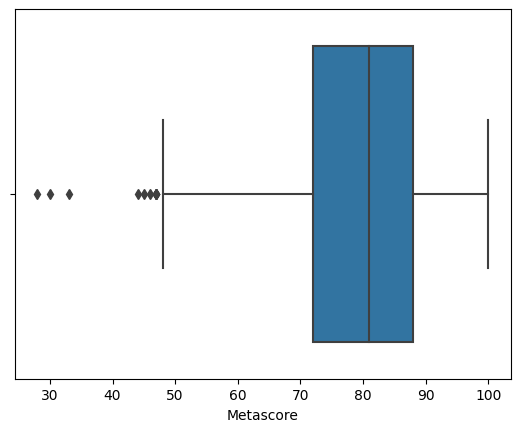

In [53]:
sns.boxplot(x = df['Metascore'])

In [54]:
def outlierThreshold(df, col, q1 = 0.25, q3 = 0.75):
    quantile1 = df[col].quantile(q1)
    quantile3 = df[col].quantile(q3)
    iqr = quantile3 - quantile1
    low_limit = quantile1 - (1.5 * iqr)
    upper_limit = quantile3 + (1.5 * iqr)
    return low_limit, upper_limit

In [55]:
def replaceWithThreshold(df, col):
    low_limit, upper_limit = outlierThreshold(df, col)
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > upper_limit), col] = upper_limit

In [56]:
replaceWithThreshold(df, 'Metascore')

<Axes: xlabel='Metascore'>

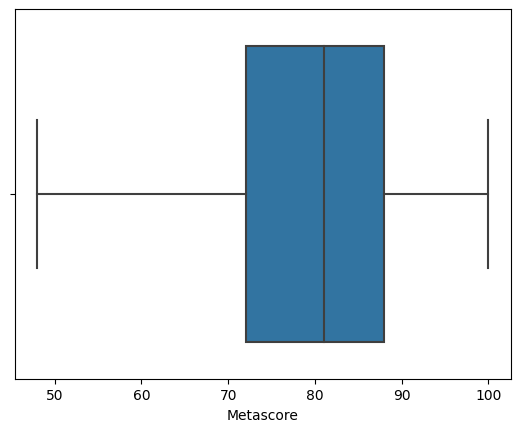

In [57]:
sns.boxplot(x = df['Metascore'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   year              1000 non-null   int64  
 2   duration          1000 non-null   object 
 3   age_limit         1000 non-null   int8   
 4   rating            1000 non-null   float64
 5   numberof_ratings  1000 non-null   object 
 6   Metascore         842 non-null    float64
dtypes: float64(2), int64(2), int8(1), object(2)
memory usage: 48.0+ KB


<Axes: xlabel='rating'>

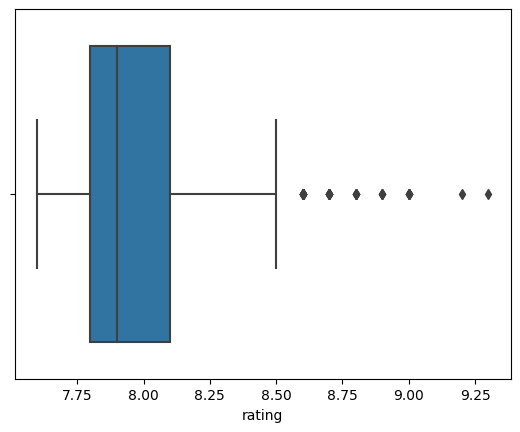

In [59]:
sns.boxplot(x = df['rating'])

In [60]:
replaceWithThreshold(df, 'rating')

<Axes: xlabel='rating'>

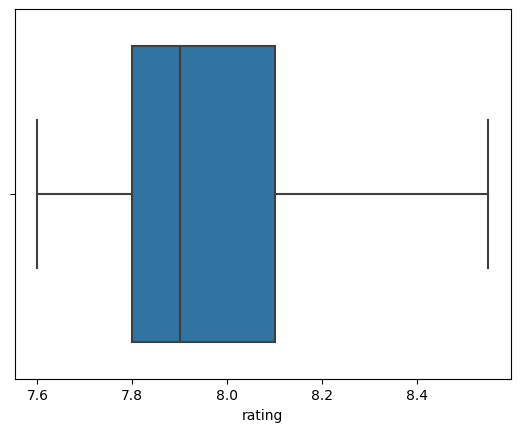

In [61]:
sns.boxplot(x = df['rating'])